In [1]:
import pandas as pd
from geo_utils import filter_france_metr

df_car = pd.read_csv('data/caracteristiques.csv',dtype={'dep':'str','com':'str','code_insee':'str'})
df_car = filter_france_metr(df_car)

df_vehicules = pd.read_csv('data/vehicules.csv')

In [2]:
df_velos = df_vehicules[df_vehicules['catv'].isin([1,50,60,80])]

In [19]:
df_accidents_velo = df_car.merge(df_velos,how='inner',on='Num_Acc')

In [20]:
df_accidents_velo.drop_duplicates(subset=['Num_Acc'], keep='last',inplace=True)

In [21]:
df_accidents_velo = filter_france_metr(df_accidents_velo)

In [103]:
df_usagers = pd.read_csv('data/usagers.csv')

In [116]:
df_lieux = pd.read_csv('data/lieux.csv',low_memory=False)

In [117]:
df_lieux['nbv'].value_counts()

 2.0     635009
 1.0     131860
 0.0     113028
 4.0     108820
 3.0      87135
 6.0      21015
 5.0      11930
 8.0       4476
-1.0       1669
 7.0       1612
 10.0       958
 9.0        491
 20.0       241
 50.0       158
 11.0       135
 12.0       122
 40.0        30
 30.0        27
 13.0        18
 25.0        14
 21.0        11
 26.0         9
 15.0         8
 90.0         7
 24.0         6
 14.0         6
 70.0         5
 22.0         5
 31.0         3
 60.0         3
 16.0         2
 53.0         2
 27.0         2
 17.0         2
 45.0         2
 28.0         1
 91.0         1
 41.0         1
 52.0         1
 33.0         1
 44.0         1
 23.0         1
 86.0         1
 18.0         1
 76.0         1
 99.0         1
 42.0         1
 65.0         1
 36.0         1
 84.0         1
 54.0         1
 29.0         1
 62.0         1
 39.0         1
Name: nbv, dtype: int64

In [22]:
from date_utils import create_date_column,create_dow_column

df_accidents_velo['date'] = create_date_column(df_accidents_velo)

def get_period(x):
    if x< 6:
        return "Aube"
    elif x<16:
        return "Jour"
    elif x<19:
        return "Crépuscule"
    else:
        return "Nuit"
df_accidents_velo["periode_journee"]=df_accidents_velo["hrmn"].apply(lambda x: get_period(int(x[:2])))

In [24]:
df_accidents_velo['day_of_week'] = create_dow_column(df_accidents_velo)

In [61]:
df_accidents_velo = df_accidents_velo[["Num_Acc", "lum","agg", "int", "atm", "col", "date", "periode_journee","day_of_week"]]

In [27]:
df_jours_feries = pd.read_csv('data/jours_feries_metropole.csv')

In [28]:
df_jours_feries['date'] = pd.to_datetime(df_jours_feries['date'])


,date,annee,zone,nom_jour_ferie
0,2002-01-01,2002,Métropole,1er janvier
1,2002-04-01,2002,Métropole,Lundi de Pâques
2,2002-05-01,2002,Métropole,1er mai
3,2002-05-08,2002,Métropole,8 mai
4,2002-05-09,2002,Métropole,Ascension
...,...,...,...,...
281,2027-07-14,2027,Métropole,14 juillet
282,2027-08-15,2027,Métropole,Assomption
283,2027-11-01,2027,Métropole,Toussaint
284,2027-11-11,2027,Métropole,11 novembre


In [81]:
df_lieux = df_lieux[["Num_Acc","catr", "circ", "plan", "surf","vosp","prof","nbv"]]
df_carac_lieux=df_accidents_velo.merge(df_lieux, how='inner',on="Num_Acc")

In [82]:
df_usagers=df_usagers[df_usagers["grav"].isin([2,3])]
accidents_graves=df_usagers['Num_Acc'].unique()
df_carac_lieux["grave"]=df_carac_lieux['Num_Acc'].apply(lambda x: "Blessure sévère ou mort" if x in accidents_graves else "Blessure légère ou pas de blessure")

In [83]:
df_carac_lieux = df_carac_lieux.dropna()

In [84]:
dict_value_by_column = {"agg":{1:"hors_agglo" , 2:"en_agglo"},
                        
                        #"int":{1:"hors_intersection", 2:"intersection", 3:"intersection", 4:"intersection",
                               
                              #5:"intersection", 6:"giratoire", 7:"place", 8:"passage_a_niveau", 9:"intersection"},
                        "catr":{1:"autoroute", 2:"route_nationale", 3:"route_departementale", 4:"voie_communales",
                                5:"hors_reseau_public", 6:"stationnement_ouvert_a_circulation",
                                7:"route_metropole_urbaine", 9:"autre"},
                        
                        "circ":{-1:"non_renseigne",0:"non renseigne", 1:"sens_unique", 2:"bidirectionnelle",
                                3:"chaussees_separees", 4:"voies_d_affectation_variable"},
                        
                        "vosp":{-1:"non_renseigne", 0:"sans_objet", 1:"piste_cyclable", 
                                2:"bande_cyclable", 3:"voie_reservee"},
                        
                        "prof":{-1:"non_renseigne",0:"non_renseigne", 1:"plat",2:"pente", 3:"sommet_de_cote", 4:"bas_de_cote"},
                        
                        "plan":{-1:"non_renseigne",0:"non_renseigne", 1:"partie_rectiligne", 2:"en_courbe_a_gauche",
                                3:"en_courbe_a_droite", 4:"en_s"}
                       }

In [85]:
df_carac_lieux = df_carac_lieux[df_carac_lieux['int']>0]

In [86]:
for key, val in dict_value_by_column.items():
    df_carac_lieux[key] = df_carac_lieux[key].apply(lambda x: val[x])

agg
int
catr
circ
vosp
prof
plan


In [87]:
sample=df_carac_lieux.sample(n=30000)
X=sample.drop(["Num_Acc", "date", "grave"],axis=1)

In [90]:
from kmodes.kmodes import KModes
from tqdm import tqdm

clusters=[]
costs=[]

for i in tqdm(range(1,31)):
    km=KModes(n_clusters=i)
    km=km.fit(X)
    
    clusters.append(i)
    costs.append(km.cost_)

# Plotting graph
plt.figure()
plt.plot(clusters, costs)
plt.title("Coûts du Clustering")
plt.ylabel("Coût")
plt.xlabel("Nombre de clusters")
plt.xticks(np.arange(1,30,2))
plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 30/30 [43:12<00:00, 86.42s/it]


NameError: name 'plt' is not defined

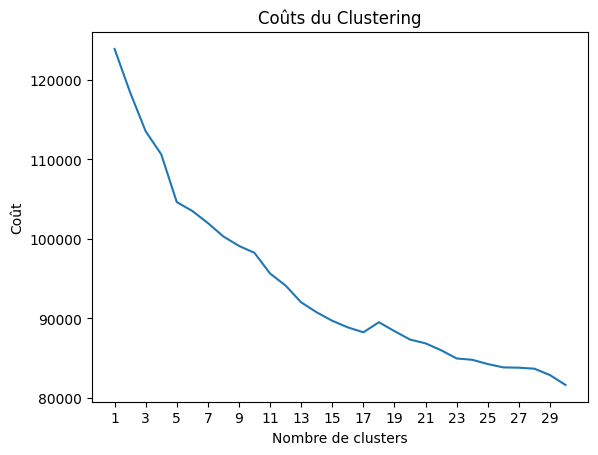

In [92]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot(clusters, costs)
plt.title("Coûts du Clustering")
plt.ylabel("Coût")
plt.xlabel("Nombre de clusters")
plt.xticks(np.arange(1,30,2))
plt.show()

On choisit de garder 13 clusters

In [94]:
km=KModes(n_clusters=13)
clusters=km.fit_predict(X)
sample["clusters"]=clusters

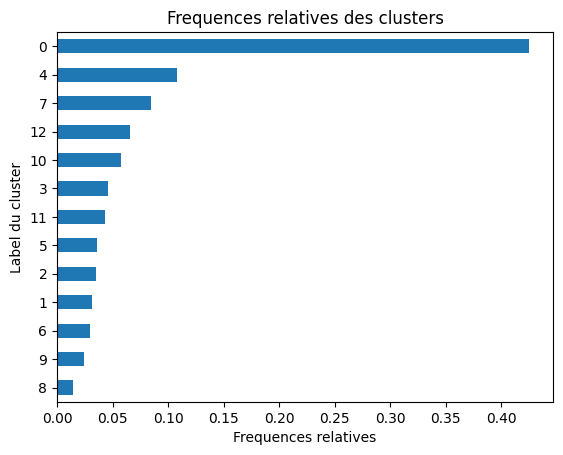

In [99]:
frequencies=sample['clusters'].value_counts(normalize=True, ascending=True)
frequencies.plot(kind="barh")
plt.title("Frequences relatives des clusters")
plt.xlabel("Frequences relatives")
plt.ylabel("Label du cluster")
plt.show()

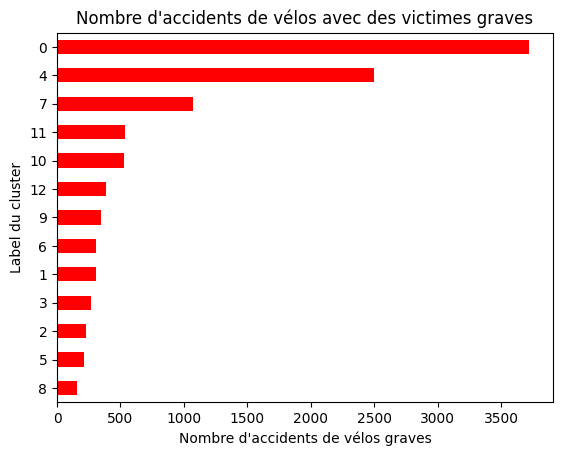

In [97]:
accidents_graves =sample[sample["grave"]=="Blessure sévère ou mort"]
freqs=accidents_graves['clusters'].value_counts(ascending=True)
freqs.plot(kind="barh", color="Red")
plt.title("Nombre d'accidents de vélos avec des victimes graves")
plt.xlabel("Nombre d'accidents de vélos graves")
plt.ylabel("Label du cluster")
plt.show()

In [109]:
clusters=np.arange(0,13,1)
total_accidents=[]
total_accidents_graves=[]
risques=[]


for i in clusters:
    cluster =sample[sample["clusters"]==i]
    total_accidents.append(len(cluster))
    total_accidents_graves.append(len(cluster[cluster["grave"]=="Blessure sévère ou mort"]))
    risques.append(len(cluster[cluster["grave"]=="Blessure sévère ou mort"])/len(cluster))

df_risques=pd.DataFrame({"cluster":clusters, "Total accidents de vélo":total_accidents, "Total accidents graves de vélo":total_accidents_graves,
                     "Risk (%)":risques})
df_risques=df_risques.set_index("cluster")
df_risques=df_risques.sort_values("Total accidents graves de vélo", ascending=False)
df_risques

,Total accidents de vélo,Total accidents graves de vélo,Risk (%)
cluster,,,
0,12755,3724,0.291964
4,3230,2498,0.773375
7,2539,1073,0.422607
11,1287,537,0.417249
10,1726,530,0.307068
12,1967,387,0.196746
9,724,345,0.476519
1,937,309,0.329776
6,898,309,0.344098


In [107]:
df_usagers['grav'].value_counts()

1    1940993
2     501549
3      67078
Name: grav, dtype: int64

In [111]:
df_risques['Total accidents graves de vélo'].sum()/df_risques['Total accidents de vélo'].sum()
## NB : il aurait peut être fallu stratifier

0.35263333333333335

In [113]:
df_carac_lieux

,Num_Acc,lum,agg,int,atm,col,date,periode_journee,day_of_week,catr,circ,plan,surf,vosp,prof,grave
0,200500000030,5,en_agglo,hors_intersection,1.0,3.0,2005-01-13,Nuit,3,route_departementale,bidirectionnelle,partie_rectiligne,1.0,sans_objet,non_renseigne,Blessure légère ou pas de blessure
1,200500000034,1,hors_agglo,hors_intersection,7.0,1.0,2005-01-19,Jour,2,route_departementale,bidirectionnelle,en_courbe_a_droite,1.0,sans_objet,plat,Blessure sévère ou mort
2,200500000078,1,hors_agglo,intersection,1.0,3.0,2005-01-26,Jour,2,route_departementale,bidirectionnelle,partie_rectiligne,1.0,sans_objet,pente,Blessure légère ou pas de blessure
3,200500000093,1,en_agglo,hors_intersection,1.0,1.0,2005-01-03,Jour,0,route_departementale,bidirectionnelle,en_courbe_a_gauche,1.0,sans_objet,plat,Blessure sévère ou mort
4,200500000170,3,hors_agglo,hors_intersection,1.0,2.0,2005-01-29,Crépuscule,5,route_departementale,bidirectionnelle,partie_rectiligne,1.0,sans_objet,plat,Blessure légère ou pas de blessure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82272,202100056362,1,en_agglo,intersection,1.0,1.0,2021-01-04,Jour,0,route_departementale,bidirectionnelle,partie_rectiligne,1.0,sans_objet,plat,Blessure légère ou pas de blessure
82273,202100056404,5,en_agglo,intersection,1.0,3.0,2021-01-01,Crépuscule,4,voie_communales,sens_unique,partie_rectiligne,1.0,bande_cyclable,plat,Blessure légère ou pas de blessure
82274,202100056424,1,en_agglo,hors_intersection,8.0,3.0,2021-01-02,Jour,5,voie_communales,sens_unique,partie_rectiligne,1.0,bande_cyclable,pente,Blessure légère ou pas de blessure
82275,202100056426,1,en_agglo,place,1.0,7.0,2021-01-02,Crépuscule,5,voie_communales,sens_unique,partie_rectiligne,1.0,piste_cyclable,plat,Blessure légère ou pas de blessure


<Figure size 640x480 with 0 Axes>

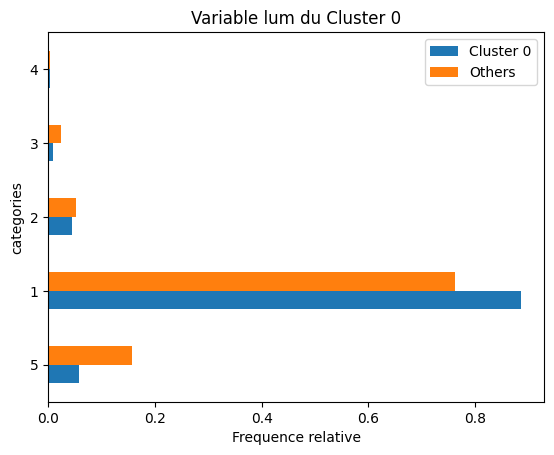

<Figure size 640x480 with 0 Axes>

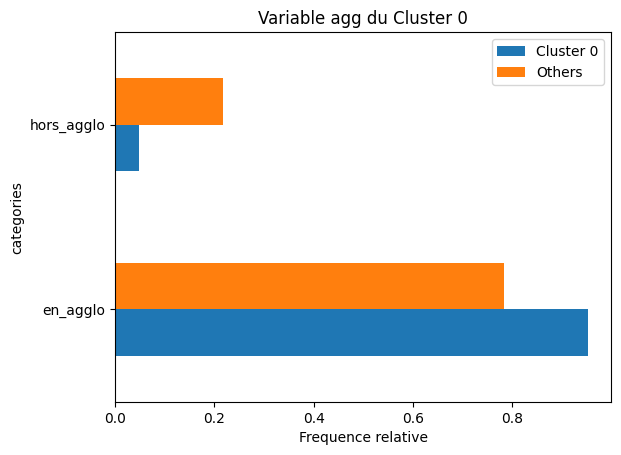

<Figure size 640x480 with 0 Axes>

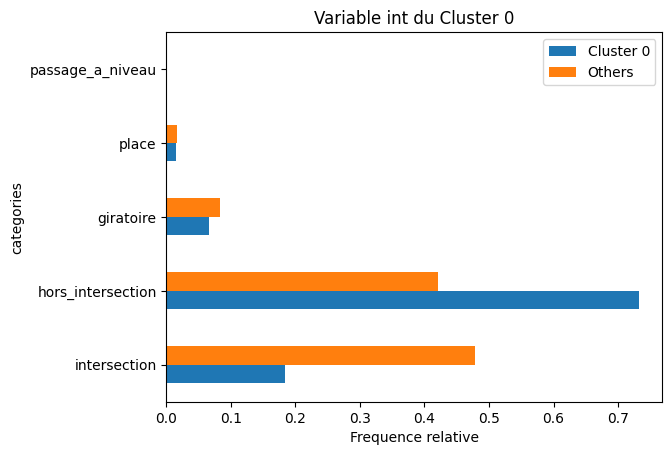

<Figure size 640x480 with 0 Axes>

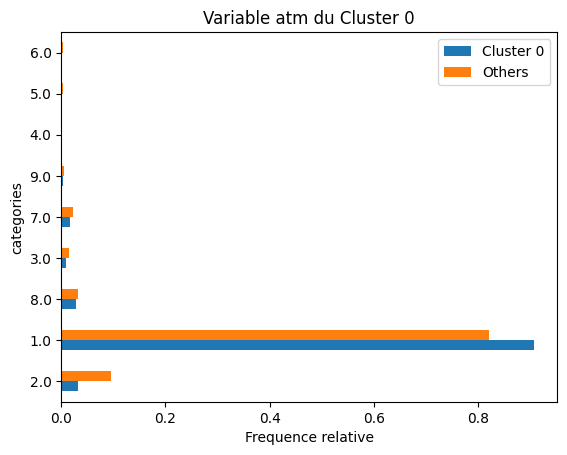

<Figure size 640x480 with 0 Axes>

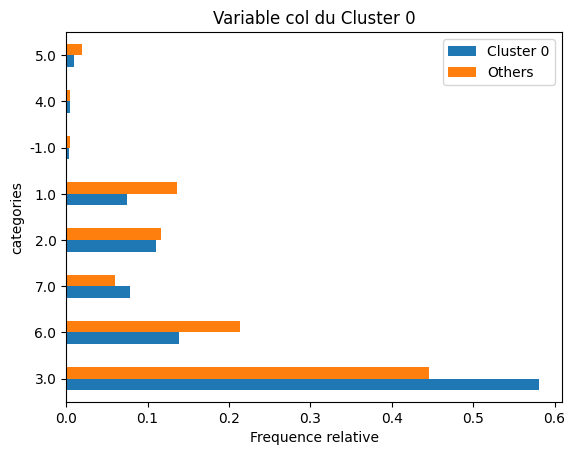

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [115]:
# Selecting the variables of interest
cluster_selected=0
interest=["lum", "agg","int", "atm", "col", 
          "date", "periode_journee", "day_of_week", "catr", "circ", "plan", "surf", "vosp", "prof"]


df_cluster=sample[sample["clusters"]==cluster_selected]
df_noncluster=sample[sample["clusters"]!=cluster_selected]


for i in interest:
    cats=sample[i].unique()
    prop_cluster=[]
    prop_noncluster=[]
    
    for x in cats:
        prop_cluster.append(len(df_cluster[df_cluster[i]==x])/len(df_cluster))
        prop_noncluster.append(len(df_noncluster[df_noncluster[i]==x])/len(df_noncluster))
    
    # Creating a DataFrame for chart ploting:
    df_plot=pd.DataFrame({"categories":cats, "Cluster {}".format(cluster_selected):prop_cluster, 
                             "Others":prop_noncluster})
    df_plot=df_plot.set_index("categories")
    
    #Chart
    plt.figure()
    df_plot.plot(kind="barh")
    plt.title("Variable {} du Cluster {}".format(i,cluster_selected))
    plt.xlabel("Frequence relative")
    plt.show()    

In [118]:
df_lieux['larrout']

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ
0,200500000001,3.0,00041,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0,63,1.0,0.0,1.0
1,200500000002,2.0,00041,0.0,NaN,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0,100,1.0,0.0,5.0
2,200500000003,2.0,00041,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,2.0,0.0,5.0
3,200500000004,3.0,00916,0.0,NaN,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0.0,1.0
4,200500000005,3.0,00110,0.0,NaN,2.0,2.0,24.0,630.0,0.0,1.0,3.0,0,59,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121566,202100056514,1.0,65,-1.0,NaN,3.0,4.0,0,454,0.0,2.0,3.0,NaN,-1,2.0,9.0,2.0
1121567,202100056515,3.0,520,0.0,D,2.0,2.0,46,2,0.0,1.0,1.0,NaN,-1,5.0,0.0,3.0
1121568,202100056516,3.0,538,-1.0,NaN,2.0,2.0,49,24,0.0,2.0,2.0,NaN,-1,2.0,0.0,1.0
1121569,202100056517,4.0,NaN,-1.0,NaN,2.0,2.0,(1),(1),0.0,1.0,2.0,NaN,-1,2.0,5.0,3.0
